In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN

#13.1

In [ ]:
df1 = pd.read_csv('s1.csv')

In [ ]:
data = df1.values 
X = StandardScaler().fit_transform(data)

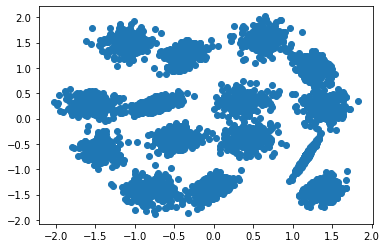

In [ ]:
plt.scatter(X[:,0], X[:,1])

## b

In [ ]:
m1 = KMeans(n_clusters=15).fit(X)

In [ ]:
pred1 = m1.predict(X)

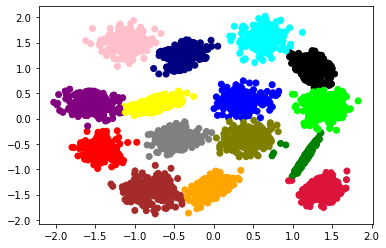

In [ ]:
colormap = np.array(['blue','red','green','yellow','orange','black','pink','cyan',
                     'brown','purple','lime','gray','navy','crimson','olive'])
plt.scatter(X[:,0], X[:,1], c= colormap[pred1])

## c

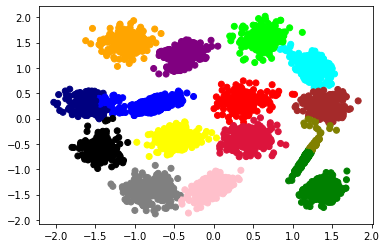

In [ ]:
m2 = AgglomerativeClustering(n_clusters = None, linkage = 'complete', distance_threshold=1.23)
pred2 = m2.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = colormap[pred2])

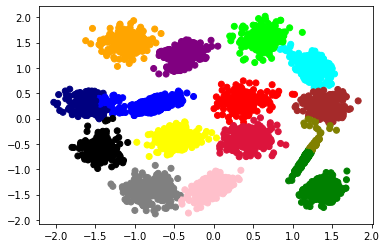

In [ ]:
m3 = AgglomerativeClustering(n_clusters = 15, linkage = 'complete')
pred3 = m3.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = colormap[pred3])

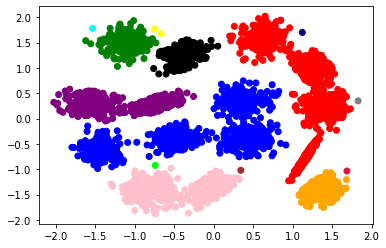

In [ ]:
m4 = AgglomerativeClustering(n_clusters = None, linkage = 'single', distance_threshold=0.149)
pred4 = m4.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = colormap[pred4])

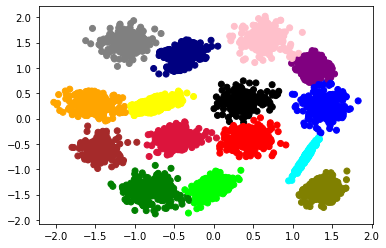

In [ ]:
clus4 = AgglomerativeClustering(n_clusters=None,distance_threshold=4) # a teraz funkcja linkage = 'ward', ta metoda jest domyślna i z reguły działa bardzo dobrze, polega 
                                                                      # na stwierdzeniu czy suma kwadratów odległości między punktami a średnią w dwóch klastrach jest dużo mniejsza 
                                                                      # niż suma kwadratów odległości między punktami a średnią na klastrze powstałym z połączenia dwóch klastrów
pred4 = clus4.fit_predict(X)
colormap = np.array(['blue','red','green','yellow','orange','black','pink','cyan',
                     'brown','purple','lime','gray','navy','crimson','olive'])
plt.scatter(X[:,0],X[:,1],c = colormap[pred4]) #działa całkiem nieźle, podłużny klaster jest bardzo ok, pytanie powstaje o punkty na granicy klastrów w prawym górnym rogu,
                                               #teraz część z nich jest przypisana do innego klastra niż w przypadku k-meansów, ale które przypisanie jest lepsze, trudno określić

## c

In [ ]:
def plot_dendogram(model, **kwargs):
s
#zaczynamy od stworzenia macierzy połączeń  a następnie zplotowania dendogramu

  counts = np.zeros(model.children_.shape[0]) #co z czym łączy?
  n_samples = len(model.labels_) #jakie klastry przypisaliśmy obserwacja, długosc 4998
  for i, merge in enumerate(model.children_): #przypisanie każdej parze numeru
    current_count = 0 # zaczynamy z licznikiem 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1 #leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack(
      [model.children_, model.distances_, counts]
  ).astype(float)
  print(linkage_matrix)

  dendrogram(linkage_matrix, **kwargs)


[[1.27400000e+03 1.45900000e+03 9.96457044e-05 2.00000000e+00]
 [1.36200000e+03 1.46100000e+03 1.75002791e-04 2.00000000e+00]
 [3.73800000e+03 3.90500000e+03 1.80439849e-04 2.00000000e+00]
 ...
 [9.98300000e+03 9.99200000e+03 5.16409436e+01 2.29300000e+03]
 [9.98600000e+03 9.99300000e+03 6.03595367e+01 2.70600000e+03]
 [9.99400000e+03 9.99500000e+03 8.83930441e+01 4.99900000e+03]]


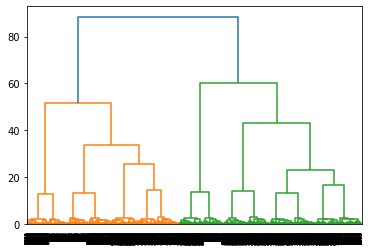

In [ ]:
plot_dendogram(clus4, truncate_mode="level") #rysujemy drzewo, widzimy, że największe różnice między węzłami występują do momentu uzyskania 15 węzłów.
#Zatem wybieramy 15 klastrów.

In [ ]:
clus4.children_[1]

array([1362, 1461])

In [ ]:
counts = np.zeros(4998)
for a in clus4.children_:
  print(a - 4998)

[-3724 -3539]
[-3636 -3537]
[-1260 -1093]
[-2388 -2288]
[-4436 -4394]
[-505 -465]
[-3231 -3142]
[-4992 -4990]
[-1018  -918]
[-4240 -4186]
[-4265 -4254]
[-4361 -4084]
[-3866 -3755]
[-4057 -3800]
[-3018 -2822]
[-992 -934]
[-4962 -4853]
[-4670 -4443]
[-250 -240]
[-292  -53]
[-2561 -2547]
[-288 -132]
[-301 -113]
[-2627 -2461]
[-4639 -4508]
[-4698 -4442]
[-2646 -2574]
[-4527 -4520]
[-4933 -4889]
[-3043 -2814]
[-1325 -1182]
[-4699    26]
[-4690 -4384]
[-4909 -4825]
[-1707 -1546]
[-3610     2]
[-4675 -4545]
[-4997 -4706]
[-555 -443]
[-964 -956]
[-4575 -4441]
[-3541 -3509]
[-1642 -1424]
[-3264 -3148]
[-4519 -4514]
[-1183 -1176]
[-4455     5]
[-4897 -4813]
[-4658 -4468]
[-4470 -4401]
[-4000 -3901]
[-217 -183]
[-530    6]
[-4608 -4503]
[-4560 -4523]
[-1668 -1594]
[-4580 -4479]
[-3180     7]
[-2069 -2032]
[-4440    25]
[-158 -131]
[-1907 -1903]
[-1650 -1540]
[-1345 -1271]
[-2313 -2261]
[-4329 -4298]
[-4510 -4500]
[-1303 -1193]
[-1224 -1158]
[-1706 -1466]
[-3338 -3269]
[-2746 -2677]
[-3404    58]


In [ ]:
list(enumerate(clus4.children_))

[(0, array([1274, 1459])),
 (1, array([1362, 1461])),
 (2, array([3738, 3905])),
 (3, array([2610, 2710])),
 (4, array([562, 604])),
 (5, array([4493, 4533])),
 (6, array([1767, 1856])),
 (7, array([6, 8])),
 (8, array([3980, 4080])),
 (9, array([758, 812])),
 (10, array([733, 744])),
 (11, array([637, 914])),
 (12, array([1132, 1243])),
 (13, array([ 941, 1198])),
 (14, array([1980, 2176])),
 (15, array([4006, 4064])),
 (16, array([ 36, 145])),
 (17, array([328, 555])),
 (18, array([4748, 4758])),
 (19, array([4706, 4945])),
 (20, array([2437, 2451])),
 (21, array([4710, 4866])),
 (22, array([4697, 4885])),
 (23, array([2371, 2537])),
 (24, array([359, 490])),
 (25, array([300, 556])),
 (26, array([2352, 2424])),
 (27, array([471, 478])),
 (28, array([ 65, 109])),
 (29, array([1955, 2184])),
 (30, array([3673, 3816])),
 (31, array([ 299, 5024])),
 (32, array([308, 614])),
 (33, array([ 89, 173])),
 (34, array([3291, 3452])),
 (35, array([1388, 5000])),
 (36, array([323, 453])),
 (37, 

In [ ]:
clus4.labels_

array([5, 5, 5, ..., 6, 6, 6])

In [ ]:
for i, merge in enumerate(model.children_):

In [ ]:
def plot_dendrogram(model, **kwargs): #aby stwierdzić ile klastrów należałoby wziąć w metodzie hierarchicznej (chcemy użyć argumentu n_clusters zamiast distance_treshold)
                                      #narysujemy dendrogram, im większa odległość od węzła do jego dzieci, tym bardziej nie powinniśmy łączyć w jeden klaster dwóch klastrów,
                                      #im mniejsza tym bardziej jesteśmy skłonni łączyć małe klastry w większy
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_) 
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    print("LM", linkage_matrix,
          "sh", linkage_matrix.shape)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
plot_dendrogram(clus4, truncate_mode="level") #rysujemy drzewo, widzimy, że największe różnice między węzłami występują do momentu uzyskania 15 węzłów.
#Zatem wybieramy 15 klastrów.

#13.2

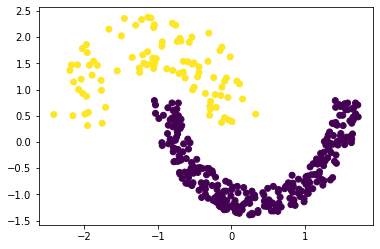

In [ ]:
url = 'jain.csv'
dataframe = pd.read_csv(url,header = 0)
data = dataframe.values
X,y = data[:,:-1],data[:,-1]
y = LabelEncoder().fit_transform(y.astype("str"))
X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0],X[:,1],c = y)

In [ ]:
df2 = pd.read_csv('jain.csv')
df2

,X0.85,X17.45,X2
0,0.75,15.60,2
1,3.30,15.45,2
2,5.25,14.20,2
3,4.90,15.65,2
4,5.35,15.85,2
...,...,...,...
367,38.75,16.85,1
368,39.00,16.60,1
369,38.25,17.35,1
370,39.50,16.95,1


In [ ]:
X, y = df2.values[:,0:2], df2.values[:,2]
X = StandardScaler().fit_transform(X)

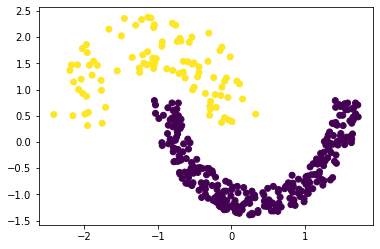

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y)

## b

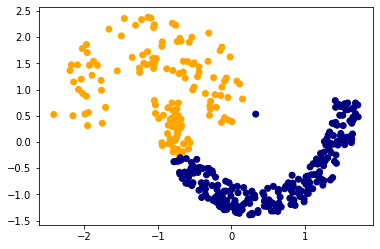

In [ ]:
n1 = KMeans(n_clusters = 2).fit_predict(X)
colormap = np.array(['navy', 'orange'])
plt.scatter(X[:,0], X[:,1], c = colormap[n1])

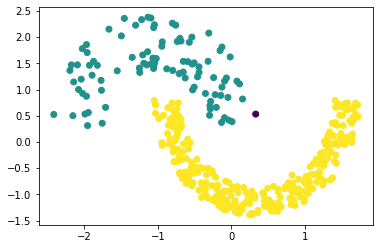

In [ ]:
#nowa metoda DBSCAN
n2 = DBSCAN(eps = 0.315, min_samples = 3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = n2)

In [ ]:
print(n2)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  3  3  3 -1 -1 -1 -1 -1 -1 -1 -1  4  4  4 -1 -1  2 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

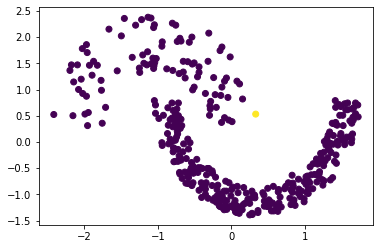

In [ ]:
n3 = AgglomerativeClustering(n_clusters = 2, linkage = 'single').fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = n3)

#13.3

In [ ]:
df3 = pd.read_csv('iris.csv')

In [ ]:
X, y = df3.values[:,:-1], df3.values[:,-1]
y = LabelEncoder().fit_transform(y)
X = StandardScaler().fit_transform(X)

## a

In [ ]:
o1 = KMeans(n_clusters = 3).fit_predict(X)
print(o1)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
o1 = -o1 -1
for j in range(3):
  which_num = 1
  suma = -1
  for i in range(3):
    suma_cz = np.sum(y[o1 == -j-1]==i)
    if suma_cz > suma:
      suma = suma_cz
      which_num = i
  o1[o1 == -j-1] = which_num

In [ ]:
np.mean(o1 == y)

0.9066666666666666

In [ ]:
np.sum(y[o1 == -3] == 2)

14

In [ ]:
y[o1 == -2] == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
o1 = -o1 -1
print(o1)

[-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -1 -1 -1 -3 -3 -3 -1 -3 -3 -3 -3 -3 -3 -3 -3 -1 -3 -3 -3 -3 -1 -3
 -3 -3 -3 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3
 -3 -3 -3 -3 -1 -3 -1 -1 -1 -1 -3 -1 -1 -1 -1 -1 -1 -3 -3 -1 -1 -1 -1 -3
 -1 -3 -1 -3 -1 -1 -3 -1 -1 -1 -1 -1 -1 -3 -3 -1 -1 -1 -3 -1 -1 -1 -3 -1
 -1 -1 -3 -1 -1 -3]


In [ ]:
clus2 = AffinityPropagation(damping = 0.982,convergence_iter=10) #zaproponujemy inny algorytm klasteryzacji - affinity propagation, 
                                                                 #który bada zależności pomiędzy wszystkimi punktami w zbiorze. Są dwa rodzaje zależności - responsibility (r(i,k))
                                                                 #która mówi jak dobrym środkiem klastra dla punktu i byłby punkt k (w porównaniu z innymi kandydatami na środek)
                                                                 # i availability (a(i,k)) która mówi o tym jak dobrym środkiem jest punkt k dla punktu i, 
                                                                 #(w porównaniu z rozważaniem punktu k jako środka wobec innych punktów niż i), w algorytmie iteracyjnie raz jedna
                                                                 #z tych wartości aktualizuje drogą, a raz druga pierwszą. Ile takich aktualizacji się wykona oznaczane jest przez
                                                                 #argument convergence_iter, argument damping jest używany ze względów obliczeniowych algorytmu i ustala w jakiej 
                                                                 #proporcji bierzemy w każdej iteracji nową prognozę wartości r i a, a w jakim tą która była krok wcześniej
pred2 = clus2.fit_predict(X)
print(pred2) #znów trzeba ujednolicić zapis y i oznaczenia na klastry

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
np.mean(pred2==y) 

0.9

In [ ]:
pred2 = -pred2-1 #ujednolicanie
for j in range(3):
  which_num = -1
  suma = -1
  for i in range(3):
    suma_cz = np.sum(y[pred2==-j-1]==i)
    if suma_cz>suma:
      suma = suma_cz
      which_num=i
  pred2[pred2==-j-1] = which_num